Fold 1/5
Epoch 1/20, Loss: 1371922.1266233767, Accuracy: 0.006493506493506494, Val Loss: 1618745.5974025973, Val Accuracy: 0.003246753246753247
Epoch 2/20, Loss: 1269644.7922077922, Accuracy: 0.008116883116883116, Val Loss: 1439644.5584415584, Val Accuracy: 0.003246753246753247
Epoch 3/20, Loss: 884271.9025974026, Accuracy: 0.00487012987012987, Val Loss: 1110993.5454545454, Val Accuracy: 0.012987012987012988
Epoch 4/20, Loss: 1134129.37987013, Accuracy: 0.012175324675324676, Val Loss: 1455650.8051948051, Val Accuracy: 0.006493506493506494
Epoch 5/20, Loss: 963105.8993506493, Accuracy: 0.004058441558441558, Val Loss: 952770.1428571428, Val Accuracy: 0.0
Epoch 6/20, Loss: 1151987.8506493506, Accuracy: 0.007305194805194805, Val Loss: 767840.4935064935, Val Accuracy: 0.003246753246753247
Epoch 7/20, Loss: 625447.2467532468, Accuracy: 0.008928571428571428, Val Loss: 1130645.5454545454, Val Accuracy: 0.003246753246753247
Epoch 8/20, Loss: 1874461.9155844157, Accuracy: 0.002435064935064935, V

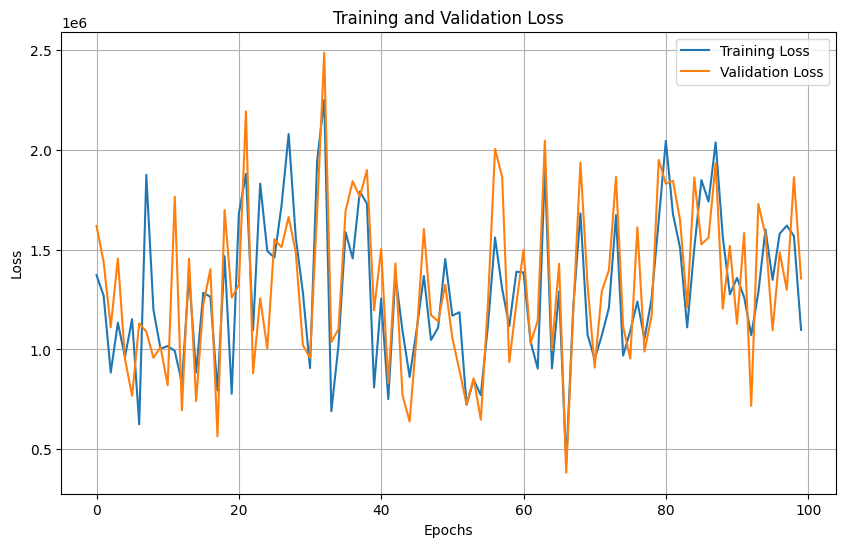

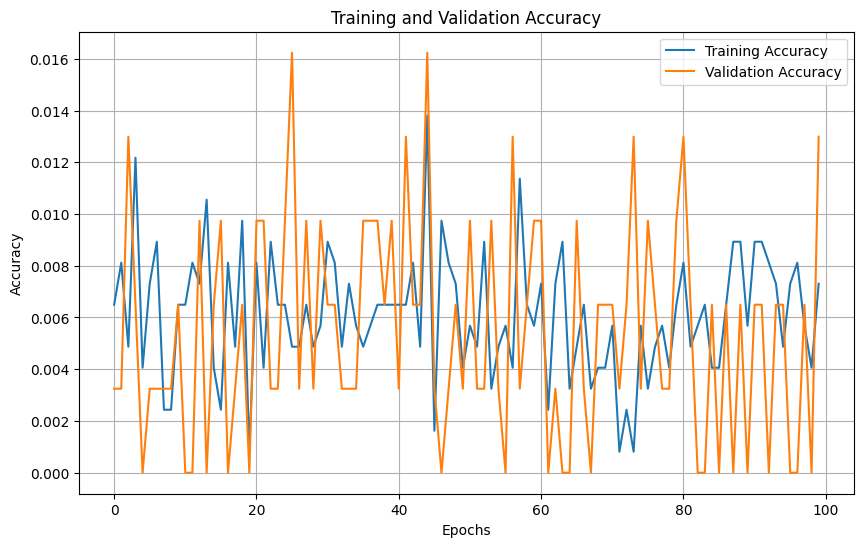

In [3]:
import os
import sys 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 현재 작업 중인 Notebook의 경로 가져오기
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "../../../utils")))
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "../../../class")))

from data import preprocess_data

from Train import Train

# 실험 설정
csv_path = "../../../Data/font_data_1540.csv"

train_instance = Train(
    epoch=20,
    batch=16,
    activation="leaky_relu",
    output_activation="softmax",
    weight_init="He",
    learning_rate=0.01,
    optimizer="adam",
    dropout=0.5,
    loss_function="mse"
)

# 데이터 로드
inputs, targets_one_hot, targets = train_instance.load_data(csv_path)

# K-Fold Cross Validation 준비
folds = train_instance.k_fold_split(inputs, targets_one_hot)
# 학습 실행
for i, (X_train, y_train, X_val, y_val) in enumerate(folds):
    print(f"Fold {i + 1}/{len(folds)}")
    train_instance.train(X_train, y_train, X_val, y_val,[256,200])

# 결과 저장 및 시각화
train_instance.save_results()
train_instance.plot_history()